## Machine learning for fraud detection in Enron’s financial and email data
### Vivek Yadav, PhD

#####  02/28/2016



#### 1. Goal of the project

In this project I investigate the Enron email data. Enron email data set is a large database of about 0.5 Mn emails from about 150 employees at Enron. The Federal Energy Regulatory Commission (FERC) for investigation acquired the data after the company filed for bankruptcy in 2001. Several board members and management employees were involved in illegal business practices, and were eventually charged. Some of these people were found guilty of fraudulent practices, and others settled out of court. These people are tagged as Persons of Interest (POI) in the data set. This project aims to develop a formal scheme to identify POIs.  The goal of this project is to develop an algorithm that has recall and precision above 0.3.  Machine learning techniques are well suited to obtain data-driven solutions to such questions. Machine learning techniques are used for developing models that can be used to learn from and make predictions on data. In this project, I apply machine learning techniques to investigate if a POI can be identified using email and financial data. 

#### 2. Data Cleaning
The first step was exploratory analysis of the data. In the dataset, there were 18 POIs and 146 total entries.  Each data point contained the 21 features, 2 of these are a variable called POI that identifies if a person is POI and other is the email address of the user. 

1. Outlier: 
The first step was to identify any outliers in the data and remove them. To identify the outliers, I plotted salary vs bonus data. There was one clear outlier; further investigation revealed this outlier was 'TOTAL'. After removing this outlier, the other values followed the expected distribution where there were a few numbers in millions and many around 100,000. 

2. Missing values:
The financial and email data were collected from different sources. Financial data came from the insider pay data, and email data came from Enron’s email set.  Therefore, for several people, financial data was missing.  For example, of the 146 entries, only 94 had information about salary (excluding TOTAL). As 0 was imputed for missing values, a machine learning algorithm may use the missing values to predict if an individual is POI or not. For example, of the 145 individuals in the data set, 50 individuals did not have email information. Of these 50 individuals, 4 (out of 18 total) were POIs. Therefore, a machine learning algorithm can utilize 0 value for salary to tag non-POIs. Further, there were only 58 individuals that had information regarding salary, bonus, restricted stock value and to_message entries, of which 14 were POIs. Therefore, to avoid the chance of machine learning algorithm using lack of information as a feature, I included only individuals who had both financial and email data. 

I selected individuals that had data for salary and to_messages entries. After this step, the number of individuals in the data set reduced to 94 and the number of POIs went from 18 to 17. I built the model based on financial and email data, the instances of these values changes as follows after this step.
- salary: 95 --> 94
- total_payments: 125 --> 94
- bonus: 82 --> 81
- restricted_stock: 110 --> 86
- other --> 93 --> 88
- to_messages: 86 --> 67
- from_messages: 86 --> 67
- from_this_person_to_poi: 86 --> 67
- from_poi_to_this_person: 86 --> 67

Important: All the POI-emails related data have information about entire data set. Therefore, a true test would have been to calculate email features for training and testing set differently. However, in this application, as the goal was to test if a machine learning algorithm can identify POIs and reveal characteristics of POIs, separate training/testing features for email features was not calculated. 

#### 3. Feature Engineering:

##### Financial data: 
After removing the incomplete salary data, I had 94 data points. I used salary, bonus, total payments, restricted stock value and other payments information to design the financial features, for email I used all the email features. From these features, I designed 10 new features.  First five are financial features. It is expected that persons involved in fraudulent practices did so for monetary gains, therefore, these people are expected to have higher additional income to salary ratio. I therefore computed the ratio of additional income and salary. Further, its possible that some individuals have large bonuses and others smaller, I therefore took log of the value to make the distribution more symmetric, and to have all the number of similar dimensions. For example, a salary varied from 50,000 to 1.2 million, however, log of these values varied from 11 to 14. 

 These are listed below, 
1.	Log of salary
2.	Log of bonus
3.	Log of total payments
4.	Log of restricted stock
5.	Log of other payments
6.	Log of total stock value
7.	Log of exercised stock option
8.	Log of expenses
9. Log of long term incentive. 

Above values are expected to be highly correlated. For example, an individual with higher salary is expected to be in upper management and should have greater incentives than a lower grade have higher bonus, total payments, restricted stock etc. Also, as total payments or total stock options are summations of different types of payments and stock options, respectively, these values are expected to be highly correlated. I therefore applied principal component analysis to reduce the dimension of the data, before applying PCA, I used MinMaxScaler() to scale data between -1 and 1. I used first 3 components of PCA because these 3 components explained about 70% of the variance. This transformation resulted in distict clustering of POI values that could be used for identifying if a given individual belongs to POI class or not. 

##### Email data: 

Email features were computed by taking log of ratios. As 0 is a valid entry, I added 1 to the ratio before computing the log. I calculated total of 5 features, as described below. I did not use a scaler for these values as all values were between 0 and 2. 
Email features
1.	Log of ratio of emails to POI and total outgoing emails
2.	Log of ratio of emails from POI and total incoming emails
3.	Log of ratio of emails to POI and total interaction with POI (sum of to, from and shared with POI emails). 
4.	Log of ratio of emails from POI and total interaction with POI (sum of to, from and shared with POI emails). 
5.	Log of To-From mail ratio to quantify how active a user is in receiving and sending out emails. 

In the email features, each entry is a distinct quantity quantifying different aspect of interaction. I therefore did not choose to use PCA for dimensionality reduction. However, I used SelectKbest to choose 3 features that had the highest chi-square statistic. These features were 
- Log of ratio of emails to POI and total outgoing emails
- Log of ratio of emails from POI and total incoming emails
- Log of To-From mail ratio to quantify how active a user is in receiving and sending out emails. 

I used the 3 financial features from PCA along with these 3 email features to make the model to predict if an individual is POI or not. 


#### 4. Predictive Modeling

##### Scoring function: 

Goal of this project was to design a machine learning algorithm that has precision and recall above 0.3. Therefore, instead of using precision or recall as scoring function, I used a custom scorer that returned minimum of precision and recall, and the goal of the algorithm was to maximize the minimum of precision and recall. 

##### Model Candidate selection:

I tested 6 algorithms. These were naïve bayes, support vector machines, decision trees, random forest, adaptive boosting, and kmeans clustering. It is crucial to select model parameters appropriately, because bad choice of parameters can result in overfitting of data or an algorithm that is too sensitive to variations in data. I used GridsearchCV to compute optimal parameters for individual models. The parameters and the values tested for individual models are given below. 

1. SVC:
    - 'C': [100,500,1e3, 5e3, 1e4, 5e4, 1e5],
    - 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
2. DecisionTree:
    - 'min_samples_split': [1,2 ,3,4,5,6,7,8],
    - 'max_depth':[1,2,3,4,5,6],
    - 'max_features':[2,3,4,5],
    - 'criterion':['gini','entropy']
3. Adaptive Boosting: 
    - 'learning_rate': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0],
    - 'n_estimators': [5,10, 25,50,75,100],
4. K-Means: 
    - 'n_clusters': [4,5,6,7,8,9]
5. Random forest: 
    - 'min_samples_split': [1,2,3,4,5,6,7,8]
    - 'max_depth':[1,2,3,4,5,6]
    - 'max_features':[2,3,4,5]
    - 'criterion':['gini','entropy']
6. Naïve Bayes


To get the best model candidate, I used GridsearchCV. It is crucial to test the performance of the model on a dataset/split that wasn’t used for training or parameter selection, because fine tuning model parameters can result in overfitting of the model. Another issue is in choosing the split data is that the training and test sets may not have the same proportion of entries for different classes. I therefore incorporated StratifiedShuffleSplit in GridsearchCV to perform crossvalidation while testing different parameters. 

I fit the model on a training set, and tested its prediction another testing set.  I generated training and testing sets using StratifiedShuffleSplit function in sklearn, and split data such that the training set is 30% of the total data. I repeated this process 25 times by setting n_iterations to 25. I provided a custom scoring function that maximized the minimum of precision and recall. After performing grid search, I got the following parameters for the models. 

- SVC: best score = 0.2803, 'C': 500, 'gamma': 0.0005
- DecisionTreeClassifier: best score =0.2789, 'max_features': 5, 'min_samples_split': 8, 'criterion': 'gini', 'max_depth': 6
- RandomForest: best score = 0.2387, 'max_features': 4, 'min_samples_split': 4, 'criterion': 'gini', 'max_depth': 6
- AdaBoostClassifier: best score = 0.222, 'n_estimators': 100, 'learning_rate': 0.4. 
- KMeans: best score: 0.2202, 'n_clusters': 9

After getting the candidate model, I checked performance on a larger set of training and test data. For this part, I used StratifiedShuffleSplit to generate 1000 sets of data with training set containing 90% of data and testing set containing 10%. This split was similar to the testing function in tester file.

##### Validation of models
It is crucial to test the performance of the model on a dataset/split that wasn’t used for training or parameter selection, because fine tuning model parameters can result in overfitting of the model. Another issue is in choosing the split data is that the training and test sets may not have same proportion of entries for different classes. I therefore used StratifiedShuffleSplit again but now used 1000 sets of data with test size restricted to 0.1. Below are performance of individual models, 

1- SVC
    - Mean Precision: 0.3313 , Mean Recall: 0.597
    - STD Precision: 0.2145 , STD Recall: 0.3355 
    - CI Precision: (0.3179, 0.3445)
    - CI_recall: (0.5761, 0.6178)
  
            
2- DecisionTree
    - Mean Precision: 0.3465 , Mean Recall: 0.2875
    - STD Precision: 0.4027 , STD Recall: 0.31
    - CI Precision: (0.3215, 0.3715)
    - CI_recall: (0.2682, 0.3067)
    
    

3- Adaptive Boosting
    - Mean Precision: 0.3419 , Mean Recall: 0.2645
    - STD Precision: 0.4127 , STD Recall: 0.3087
    - CI Precision: (0.3163, 0.36755)
    - CI_recall: (0.2453, 0.2836)
            

4- Random Forest
    - Mean Precision: 0.2144 , Mean Recall: 0.1555
    - STD Precision: 0.367 , STD Recall: 0.2521
    - CI Precision: (0.1915, 0.2371)
    - CI_recall: (0.1398, 0.1711)


5- Naive Bayes
    - Mean Precision: 0.1311 , Mean Recall: 0.0995
    - STD Precision: 0.2911 , STD Recall: 0.1996
    - CI Precision: (0.1130, 0.1492)
    - CI_recall: (0.0871, 0.1118)


6- K-Means
    - Mean Precision: 0.1285 , Mean Recall: 0.211
    - STD Precision: 0.2798 , STD Recall: 0.4
    - CI Precision: (0.1111, 0.1458)
    - CI_recall: (0.1861, 0.2358)


#### Final candidate model selection
From above, SVC provided the best precision and recall, further the 95% confidence interval for both precision and recall were above 0.3 for this algorithm only. I therefore will use this for further tuning. 


#### Additional Analysis on PCA
I used PCA on all the data and calculated principal components for all the financial features. This method however computed PCA based on all the data, therefore, there could be some information leakage from test to training data. I therefore tested the effect of performing PCA separately on training set, and using those Principal components for dimensionality reduction. For this process, I used pipeline in sklearn. I varied the parameters of SVC (C and gamma) along with number of principal components of financial features. In addition I varied K in selectkbest to compute the best combination of email factors. After this process, the score changed as follows, 

1- SVC with PCA on all data, with finer gridsearchCV, 'C': 150, 'gamma': 0.005. 
    - Mean Precision: 0.3745 , Mean Recall: 0.6715
    - STD Precision: 0.2224 , STD Recall: 0.3367
    - CI Precision: (0.3606, 0.3882)
    - CI_recall: (0.6505, 0.6924)
2- SVC with PCA on training data in each validation/fitting cycle
    - Mean Precision: 0.5043 , Mean Recall: 0.563
    - STD Precision: 0.3688 , STD Recall: 0.35 
    - CI Precision: (0.4832, 0.5247)
    - CI_recall: (0.5414, 0.5846)

### Final model

After analysis above, I chose to use a model in which I fit PCA to each training data set, and use those principal components to transform test data. After using pipeline and gridsearchCV, I got the following modeling parameters,
- C = 5
- gamma = 0.01
- Number of principal components for financial features, 3
- Number of email features, 2

After using this values in the final model, I got precision and recall values above 0.3. These values are, 
- Accuracy: 0.79380	
- Precision: 0.48674	
- Recall: 0.56900	
- F1: 0.52467	F2: 0.55040
- Total predictions: 10000	True positives: 1138	False positives: 1200	False negatives:  862	True negatives: 6800


Recall of 0.569 indicates that if a person is POI, the model can identify that person as POI 56.9% of the time. 
Precision of 0.487 indicates that among all the people identified as POI by the model, only 48.7% are POIs. 


In [1]:
## Loading libraries for program
from IPython.display import Image
import matplotlib.pyplot as plt
import sys
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cluster import KMeans
sys.path.append("../tools/")
from tester import test_classifier 
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import RandomizedPCA, PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.cross_validation import StratifiedShuffleSplit
import scipy.stats as st
from sklearn.cluster import MiniBatchKMeans
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from feature_format import featureFormat
from feature_format import targetFeatureSplit
from pprint import pprint

### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label


In [2]:
# Calculating precision and recall
%pylab inline

def precision_recall(labels,predictions):
    ind_true_pos = [i for i in range(0,len(labels)) if (predictions[i]==1) & (labels[i]==1)]
    ind_false_pos = [i for i in range(0,len(labels)) if ((predictions[i]==1) & (labels[i]==0))]
    ind_false_neg = [i for i in range(0,len(labels)) if ((predictions[i]==0) & (labels[i]==1))]
    ind_true_neg = [i for i in range(0,len(labels)) if ((predictions[i]==0) & (labels[i]==0))]
    precision = 0
    recall = 0
    
    
    ind_labels = [i for i in range(0,len(labels)) if labels[i]==1]
    
    if len(ind_labels) !=0:
        if float( len(ind_true_pos) + len(ind_false_pos))!=0:
            precision = float(len(ind_true_pos))/float( len(ind_true_pos) + len(ind_false_pos))
        if float( len(ind_true_pos) + len(ind_false_neg))!=0:
            recall = float(len(ind_true_pos))/float( len(ind_true_pos) + len(ind_false_neg))
        return precision, recall
    else:
        return -1,-1

# Getting PCA
def features_pca(features_fin,n_comp):
    scaler = MinMaxScaler()
    finance_scaler = scaler.fit(features_fin)
    features_fin = finance_scaler.transform(features_fin)

    pca = RandomizedPCA(n_components=n_comp,whiten=True).fit(features_fin)
    #print 'pca', pca
    features_fin = pca.transform(features_fin)
    features_fin = np.array(features_fin)
    return pca, features_fin

# Plotting function
def plot_data(labels, X, ind_1,ind_2,xlab,ylab):
    for i in range(0,len(labels)):
        x_i = X[i]
        if labels[i] == 0:
            matplotlib.pyplot.scatter(X[i][ind_1], X[i][ind_2],color ='k')
    for i in range(0,len(labels)):
        x_i = X[i]
        if labels[i] == 1:
            matplotlib.pyplot.scatter(X[i][ind_1], X[i][ind_2],color ='r')
    matplotlib.pyplot.xlabel(xlab)
    matplotlib.pyplot.ylabel(ylab)
    

class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        col_list = []
        X = np.array(X)
        #print self.cols
        for c in self.cols:
            #print c
            col_list.append(X[:,c:c+1])
        #print np.concatenate(col_list, axis=1)    
        return np.concatenate(col_list, axis=1)

    def fit(self, X, y=None):
        return self

Populating the interactive namespace from numpy and matplotlib


#### Exploratory analysis

In [3]:
# EDA 
print 'Exploratory Analysis:'
features_list = ["poi"]

### load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

Exploratory Analysis:


In [4]:
print "Total number of executives :", len(data_dict.keys())
features_list = ["poi","salary", "bonus"]
my_dataset = data_dict
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


feature_all = data_dict[data_dict.keys()[1]].keys()
print ''
print 'Instances BEFORE removing outliers/missing data'
print ''

for f_i in range(0,len(feature_all)):
    f_all = feature_all
    feature_count = [k for k,v in data_dict.items() if isinstance(v[f_all[f_i]],int)]
    print f_all[f_i], len(feature_count)

Total number of executives : 146

Instances BEFORE removing outliers/missing data

salary 95
to_messages 86
deferral_payments 39
total_payments 125
exercised_stock_options 102
bonus 82
restricted_stock 110
shared_receipt_with_poi 86
restricted_stock_deferred 18
total_stock_value 126
expenses 95
loan_advances 4
from_messages 86
other 93
from_this_person_to_poi 86
poi 146
director_fees 17
deferred_income 49
long_term_incentive 66
email_address 0
from_poi_to_this_person 86


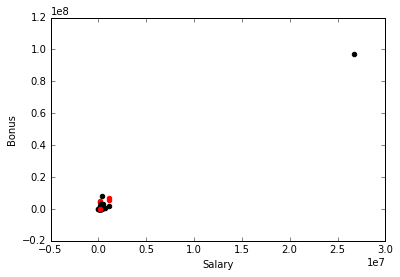

In [5]:
X = features
ind_1 = 0
ind_2 = 1
for i in range(0,len(labels)):
    x_i = X[i]
    if labels[i] == 1:
        matplotlib.pyplot.scatter(X[i][ind_1], X[i][ind_2],color ='r')
    else:
        matplotlib.pyplot.scatter(X[i][ind_1], X[i][ind_2],color ='k')
matplotlib.pyplot.xlabel("Salary")
matplotlib.pyplot.ylabel("Bonus")
matplotlib.pyplot.show()

There is one clear outlier. This outlier was 'TOTAL'. In addition data points with missing values were deleted. Only data that had 'salary' information were taken. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: divide by zero encountered in log


Outliers/missing values removed =  52


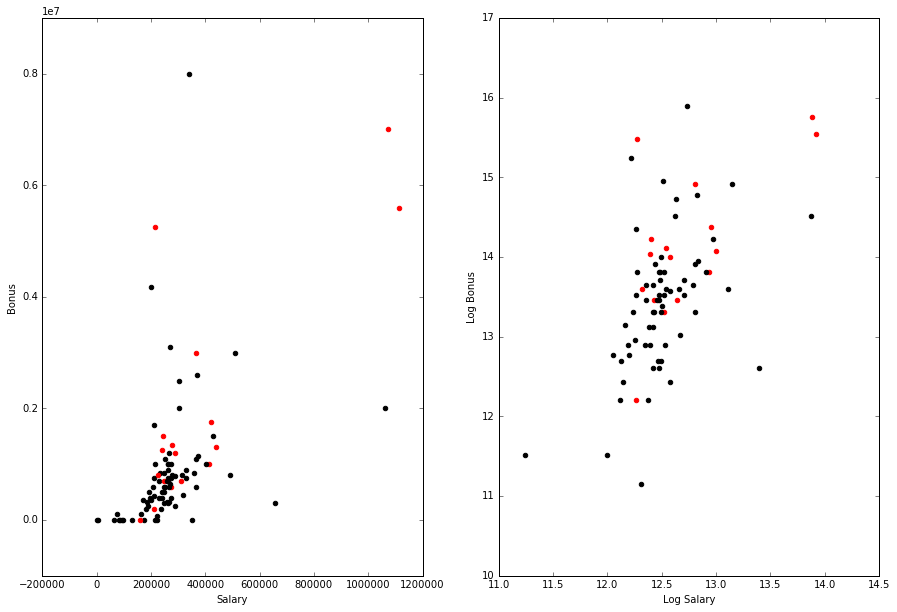

Total number of executives : 94

Instances BEFORE removing outliers/missing data

salary 94
to_messages 67
deferral_payments 26
total_payments 94
exercised_stock_options 71
bonus 81
restricted_stock 86
shared_receipt_with_poi 67
restricted_stock_deferred 9
total_stock_value 90
expenses 81
loan_advances 3
from_messages 67
other 88
from_this_person_to_poi 67
poi 94
director_fees 0
deferred_income 36
long_term_incentive 64
email_address 0
from_poi_to_this_person 67


In [6]:
# OUTLIER REMOVAL
i_count = 0
key_rm  = list()
for key in data_dict:
    data_dict[key]['id'] = i_count
    i_count += 1
    in_salary = isinstance(data_dict[key]['salary'],int)
    in_ToMsg = isinstance(data_dict[key]['to_messages'],int)
    in_bonus = isinstance(data_dict[key]['bonus'],int)
    in_resSt = isinstance(data_dict[key]['restricted_stock'],int)
    if (in_salary==False): #|(in_ToMsg==False): #|(in_resSt==False)|(in_bonus==False):
        key_rm.append(key)
    if (in_salary & in_bonus): 
        if ((data_dict[key]['bonus']>=5000000.0) & (data_dict[key]['salary']>=5000000.0) ):
            key_rm.append(key)
            
            
print 'Outliers/missing values removed = ',len(key_rm)
for ki in key_rm:
    data_dict.pop( ki, 0 )

my_dataset = data_dict
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

X = features
ind_1 = 0
ind_2 = 1

matplotlib.pyplot.figure(figsize=(15,10))
ax1 = subplot(1,2,1)
for i in range(0,len(labels)):
    x_i = X[i]
    if labels[i] == 1:
        matplotlib.pyplot.scatter( (X[i][ind_1]), (X[i][ind_2]),color ='r')
    else:
        matplotlib.pyplot.scatter( (X[i][ind_1]), (X[i][ind_2]),color ='k')

matplotlib.pyplot.xlabel("Salary")
matplotlib.pyplot.ylabel("Bonus")
ax2 = subplot(1,2,2)
for i in range(0,len(labels)):
    x_i = X[i]
    if labels[i] == 1:
        matplotlib.pyplot.scatter(np.log(X[i][ind_1]), np.log(X[i][ind_2]),color ='r')
    else:
        matplotlib.pyplot.scatter(np.log(X[i][ind_1]), np.log(X[i][ind_2]),color ='k')

matplotlib.pyplot.xlabel("Log Salary")
matplotlib.pyplot.ylabel("Log Bonus")

matplotlib.pyplot.show()



print "Total number of executives :", len(data_dict.keys())
print ''
print 'Instances BEFORE removing outliers/missing data'
print ''

for f_i in range(0,len(feature_all)):
    f_all = feature_all
    feature_count = [k for k,v in data_dict.items() if isinstance(v[f_all[f_i]],int)]
    print f_all[f_i], len(feature_count)

I took log of values so the salary, bonus, restricted stock etc are in the same range. For example, salary varied between 50000 and 1.2 million, by taking log these values varied between 11 and 14. 

For email feature, ratio of mails sent to/from POI were divided by total to/from mails. As 0 is valid entry, 1 was added to the ratio. 

These resulted in 9 financial features and 5 email features. 

In [7]:
## MAKING NEW FEATURES    
features_list = ["poi"]
for key in data_dict:
    
    data_dict[key]['log_total'] = 0
    data_dict[key]['log_bonus'] = 0
    data_dict[key]['log_restricted'] = 0
    data_dict[key]['log_other'] = 0
    data_dict[key]['log_salary'] = 0
    data_dict[key]['log_exercised_stock_options'] = 0
    data_dict[key]['log_long_term_incentive'] = 0
    data_dict[key]['log_total_stock_value'] = 0
    data_dict[key]['log_expense'] = 0

    
    in_salary = isinstance(data_dict[key]['salary'],int)
    in_ToMsg = isinstance(data_dict[key]['to_messages'],int)
    in_bonus = isinstance(data_dict[key]['bonus'],int)
    in_resSt = isinstance(data_dict[key]['restricted_stock'],int)
    in_TPay = isinstance(data_dict[key]['total_payments'],int)
    in_Othr = isinstance(data_dict[key]['other'],int)
    in_exrSt = isinstance(data_dict[key]['exercised_stock_options'],int)
    in_LTI = isinstance(data_dict[key]['long_term_incentive'],int)
    in_totSt = isinstance(data_dict[key]['total_stock_value'],int)
    in_exp = isinstance(data_dict[key]['expenses'],int)

    if  (in_salary):
        
        v_salary = float(data_dict[key]['salary'])
        v_totpay = float(data_dict[key]['total_payments'])
        v_bonus = float(data_dict[key]['bonus'])
        v_ResSt = float(data_dict[key]['restricted_stock'])
        v_Other = float(data_dict[key]['other'])
        v_exrSt = float(data_dict[key]['exercised_stock_options'])
        v_LTI = float(data_dict[key]['long_term_incentive'])
        v_totSt = float(data_dict[key]['total_stock_value'])
        v_exps = float(data_dict[key]['expenses'])

        
        data_dict[key]['log_salary'] = np.log(v_salary)
        
        
        if (in_TPay):
            data_dict[key]['log_total'] = np.log(v_totpay ) 
        if (in_bonus):
            data_dict[key]['log_bonus'] =  np.log(v_bonus) 
        if (in_resSt):
            data_dict[key]['log_restricted'] =  np.log(v_ResSt) 
        if (in_Othr):
            data_dict[key]['log_other'] =  np.log(v_Other)  
        if (in_exrSt):
            data_dict[key]['log_exercised_stock_options'] =  np.log(v_exrSt)  
        if (in_LTI):
            data_dict[key]['log_long_term_incentive'] =  np.log(v_LTI)  
        if (in_totSt):
            data_dict[key]['log_total_stock_value'] =  np.log(v_totSt)  
        if (in_exp):
            data_dict[key]['log_expense'] =  np.log(v_exps)  
         
        
    data_dict[key]['to_ratio'] = 0
    data_dict[key]['from_ratio'] = 0
    data_dict[key]['from_poi_ratio'] = 0
    data_dict[key]['to_poi_ratio'] = 0
    data_dict[key]['to_mail_ratio'] = 0

    is_frmPoiToThis = isinstance(data_dict[key]['from_poi_to_this_person'],int)
    is_frmThisToPoi = isinstance(data_dict[key]['from_this_person_to_poi'],int)

    if  is_frmPoiToThis & is_frmThisToPoi:
        poi_fr = float(data_dict[key]['from_poi_to_this_person'])
        poi_to = float(data_dict[key]['from_this_person_to_poi'])        
        poi_sh= float(data_dict[key]['shared_receipt_with_poi'])        
        total_to = float(data_dict[key]['to_messages'])    
        total_frm= float(data_dict[key]['from_messages'])    
        poi_tot = poi_to+poi_fr+poi_sh
        if total_to!= 0:
            data_dict[key]['to_ratio'] = np.log(poi_to/total_to + 1)
        if total_frm!= 0:
            data_dict[key]['from_ratio'] = np.log(poi_fr/total_frm + 1)
            data_dict[key]['to_mail_ratio'] = np.log(total_to/(total_to+total_frm) + 1)
            
        if poi_tot!= 0:
            data_dict[key]['to_poi_ratio'] =  np.log(poi_to/(poi_to+poi_fr+poi_sh) + 1)
            data_dict[key]['from_poi_ratio'] = np.log(poi_fr/(total_to+total_frm) + 1)
            
features_list.append('log_salary')
features_list.append('log_total')
features_list.append('log_bonus')
features_list.append('log_restricted')
features_list.append('log_other')
features_list.append('log_exercised_stock_options')
features_list.append('log_long_term_incentive')
features_list.append('log_total_stock_value')
features_list.append('log_expense')

n_fin = len(features_list)-1
features_list.append('to_ratio') # Total to poi divided by total to messages
features_list.append('from_ratio') # Total to poi divided by total to messages
features_list.append('to_poi_ratio') # Total mails to POI divided by total interaction with poi.
features_list.append('from_poi_ratio') # Total from to total messages
features_list.append('to_mail_ratio') # Number of to mails divided by total mails

In [8]:
print 'total_people :', len(data_dict.keys())
poi_count = [k for k,v in data_dict.items()if v['poi']==1]
print 'POIs count:' ,len(poi_count) 

total_people : 94
POIs count: 17


In [9]:
my_dataset = data_dict
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#### Email features
I plot individual financial features. As expected, the financial features seem correlated. I will therefore use PCA to reduce the dimensionality of system.

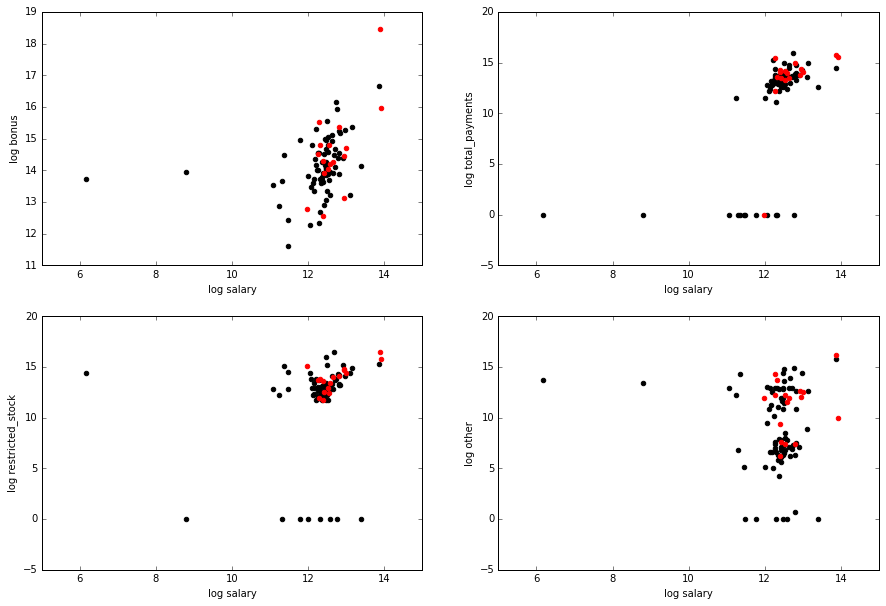

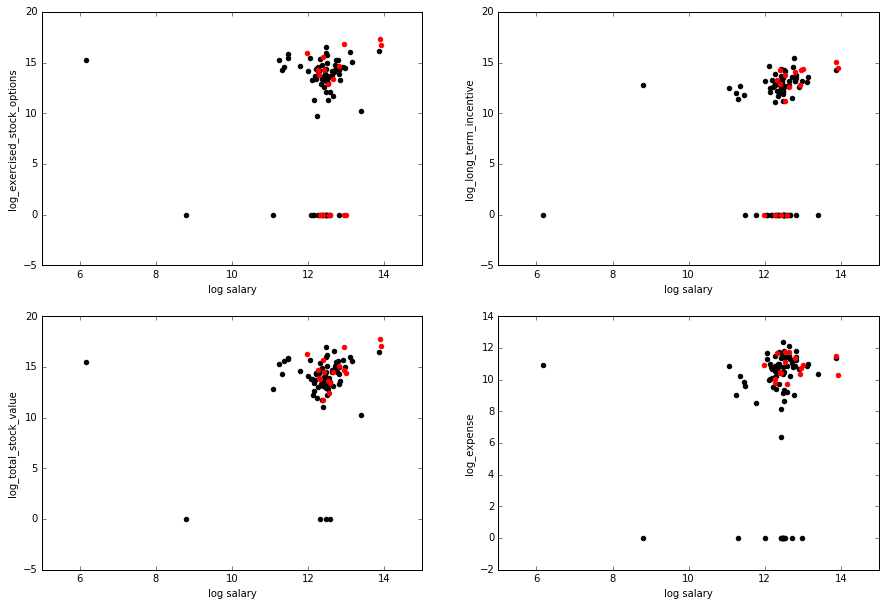

In [10]:
X = features
matplotlib.pyplot.figure(figsize=(15,10))
ax1 = subplot(2,2,1)
plot_data(labels, X, 0,1,'log salary','log bonus')
ax2 = subplot(2,2,2)
plot_data(labels, X, 0,2,'log salary','log total_payments')
ax3 = subplot(2,2,3)
plot_data(labels, X, 0,3,'log salary','log restricted_stock')
ax4 = subplot(2,2,4)
plot_data(labels, X, 0,4,'log salary','log other')

matplotlib.pyplot.show()

matplotlib.pyplot.figure(figsize=(15,10))
ax1 = subplot(2,2,1)
plot_data(labels, X, 0,5,'log salary','log_exercised_stock_options')
ax2 = subplot(2,2,2)
plot_data(labels, X, 0,6,'log salary','log_long_term_incentive')
ax3 = subplot(2,2,3)
plot_data(labels, X, 0,7,'log salary','log_total_stock_value')
ax4 = subplot(2,2,4)
plot_data(labels, X, 0,8,'log salary','log_expense')

matplotlib.pyplot.show()



I computed PCA for financial data. I chose first 3 principal components because these represented 70% of variance in data. Plots of principal components show that this transformation results in close clustering of POI data (points in red). 

Variance explained by 3 PCs :  0.690348975237


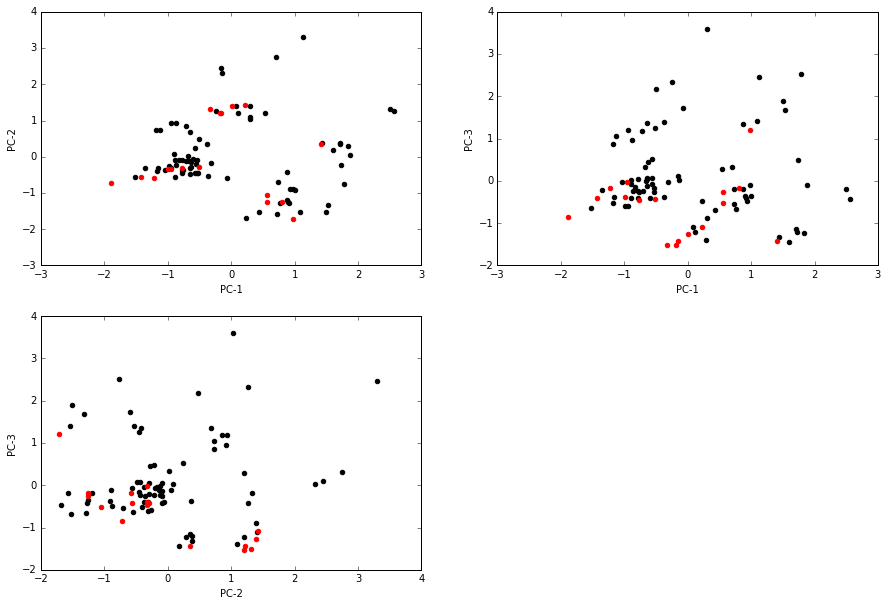

RandomizedPCA(copy=True, iterated_power=3, n_components=3, random_state=None,
       whiten=True)


In [11]:
features = np.array(features)

features_fin = features[:,range(0,n_fin)]
pca_fin, features_fin_pc = features_pca(features_fin,3)

labels_array = np.array(labels)

print 'Variance explained by 3 PCs : ', sum(pca_fin.explained_variance_ratio_)


matplotlib.pyplot.figure(figsize=(15,10))

ax1 = subplot(2,2,1)
plot_data(labels, features_fin_pc, 0,1,'PC-1','PC-2')
ax1 = subplot(2,2,2)
plot_data(labels, features_fin_pc, 0,2,'PC-1','PC-3')
ax1 = subplot(2,2,3)
plot_data(labels, features_fin_pc, 1,2,'PC-2','PC-3')

matplotlib.pyplot.show()

features = np.concatenate((features,features_fin), axis=1) 
print pca_fin

In [12]:
my_dataset
i_count = 0
for key in my_dataset:
    
    my_dataset[key]['PC1_fin'] = features_fin_pc[i_count][0]
    my_dataset[key]['PC2_fin'] = features_fin_pc[i_count][1]
    my_dataset[key]['PC3_fin'] = features_fin_pc[i_count][2]
    i_count+=1


#### Email features

I next plotted email features. Plots indicate that log(to_POI/total_POI) and log(frm_POI/total_POI) do not provide any additional information. log(to_POI/total_POI) and log(to_poi/total_to) show similar variations, and log(to_poi/total_to) and log(frm_POI/total_POI) show similar variations. I therefore use SelectKbest features to select 3 best features. 

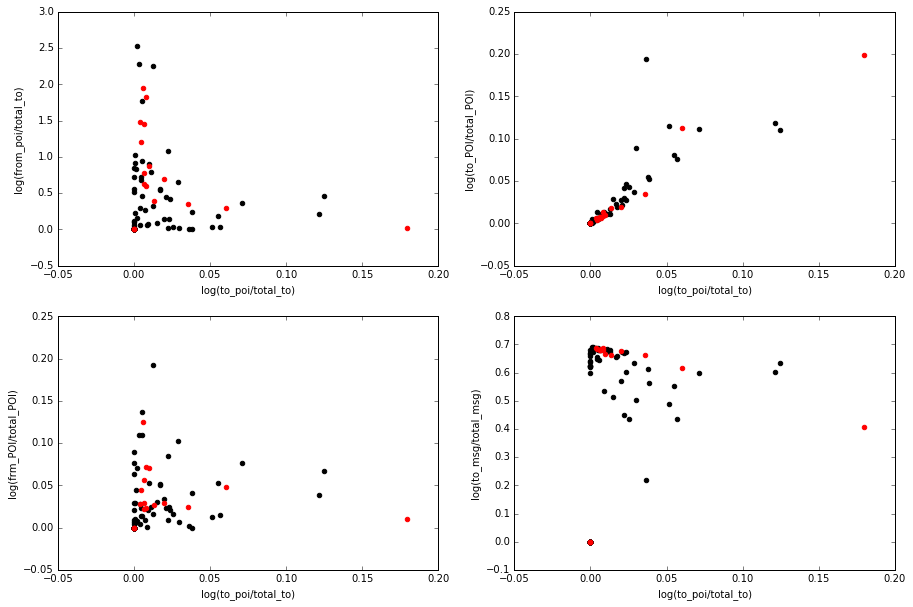

In [13]:
X = features
matplotlib.pyplot.figure(figsize=(15,10))
ax1 = subplot(2,2,1)
plot_data(labels, X, 9,10,'log(to_poi/total_to)','log(from_poi/total_to)')
ax2 = subplot(2,2,2)
plot_data(labels, X, 9,11,'log(to_poi/total_to)','log(to_POI/total_POI)')
ax3 = subplot(2,2,3)
plot_data(labels, X, 9,12,'log(to_poi/total_to)','log(frm_POI/total_POI)')
ax4 = subplot(2,2,4)
plot_data(labels, X, 9,13,'log(to_poi/total_to)','log(to_msg/total_msg)')
matplotlib.pyplot.show()

I used selectKbest to get important features. The 3 best emal features were, 'log(to_poi/total_to)','log(from_poi/total_to)' and 'log(to_msg/total_msg)'.

In [14]:
features_eml = np.array(X[:,range(n_fin,len(features_list)-1)])
print features_eml[0]
ch2 = SelectKBest(chi2, k=3)
X_eml = ch2.fit_transform(features_eml, labels)
print X_eml[0]

[ 0.02215119  0.02118628  0.04190107  0.00917886  0.4506644 ]
[ 0.02215119  0.02118628  0.4506644 ]


In [15]:
features_list = ['poi','PC1_fin','PC2_fin','PC3_fin','to_ratio','from_ratio','to_mail_ratio']
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)
X = np.array(features)
features = np.array(features)
n_fin = 3

I made a custom scoring function that maximised the minimum of precision and recall. 

In [16]:
# Custom scoring function
# Scoring function is min of precision and recall. 
# The gridsearch method tries to maximize the minimum of precision and recall. 

def custom_scorer(labels, predictions):
    precision,recall = precision_recall(labels,predictions)
    min_score = min(precision,recall)
    return min_score
score  = make_scorer(custom_scorer, greater_is_better=True)

In [17]:
# Test-train split for Cross validation
sss = StratifiedShuffleSplit(labels_array, 25, test_size=0.3, random_state=42)


Below I fit various models to predict POI from data. 


In [18]:
## SVC model
param_grid = {
         'C': [1,5,10,20,30,100,500,1000,5000],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }


grid_search_SVC = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid,cv=sss,
                       scoring=score)
grid_search_SVC = grid_search_SVC.fit(X, labels_array)
clf_svc = grid_search_SVC.best_estimator_
print clf_svc
print grid_search_SVC.best_score_
print grid_search_SVC.best_params_

SVC(C=500, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.280321854616
{'C': 500, 'gamma': 0.0005}


In [19]:
## Decision tree
param_grid = {
         'min_samples_split': [1,2 ,3,4,5,6,7,8],
         'max_depth':[1,2,3,4,5,6],
         'max_features':[2,3,4,5],
         'criterion':['gini','entropy']
        }
DT_clf = DecisionTreeClassifier(random_state=42)
grid_search_DT = GridSearchCV(DT_clf, param_grid,cv=sss,
                       scoring=score)
grid_search_DT = grid_search_DT.fit(X, labels_array)
clf_DT = grid_search_DT.best_estimator_

print clf_DT
print grid_search_DT.best_score_
print grid_search_DT.best_params_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=5, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
0.278915750916
{'max_features': 5, 'min_samples_split': 8, 'criterion': 'gini', 'max_depth': 6}


In [20]:
## Random Forest
param_grid = {
         'min_samples_split': [1,2 ,3,4,5,6,7,8],
         'max_depth':[1,2,3,4,5,6],
         'max_features':[2,3,4,5],
         'criterion':['gini','entropy']        
        }
RF_clf = RandomForestClassifier(random_state=42)
grid_search_RF = GridSearchCV(RF_clf, param_grid,cv=sss,
                       scoring=score)
grid_search_RF = grid_search_RF.fit(X, labels_array)
clf_RF = grid_search_RF.best_estimator_

print clf_RF
print grid_search_RF.best_score_
print grid_search_RF.best_params_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=4, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
0.238701298701
{'max_features': 4, 'min_samples_split': 4, 'criterion': 'gini', 'max_depth': 6}


In [21]:
## Adaptive boosting algorithm
param_grid = {
         'learning_rate': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0],
          'n_estimators': [5,10, 25,50,75,100],
        }

grid_search_ADB = GridSearchCV(AdaBoostClassifier(), param_grid,cv=sss,
                       scoring=score)
grid_search_ADB.fit(X, labels_array)
clf_adb = grid_search_ADB.best_estimator_
print clf_adb
print grid_search_ADB.best_score_
print grid_search_ADB.best_params_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=25, random_state=None)
0.249857142857
{'n_estimators': 25, 'learning_rate': 0.5}


In [22]:
clf_NB = GaussianNB()
clf_NB = clf_NB.fit(X,labels_array)
print clf_NB

GaussianNB()


In [23]:
param_grid = {
          'n_clusters': [4,5,6,7,8,9],
        }

grid_search_KM = GridSearchCV(KMeans(random_state=42), param_grid,cv=sss,
                       scoring=score)
grid_search_KM = grid_search_KM.fit(X, labels_array)
clf_KM = grid_search_KM.best_estimator_

print clf_KM
print grid_search_KM.best_score_
print grid_search_KM.best_params_

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=9, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)
0.220222222222
{'n_clusters': 9}


In [24]:
def get_CI_mean_PrecisionRecall(X,labels_array,clf,sss):
    precision_all = []
    recall_all = []
    i_count = 0
    for train_index, test_index in sss:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = labels_array[train_index], labels_array[test_index]
        clf = clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        precision,recall = precision_recall(y_test,predictions)
    
        if precision!=-1:
            i_count +=1
            #print i_count, "Precision:", round(precision, 4), " , Recall:", round(recall, 4)
            precision_all.append(precision)
            recall_all.append(recall)
    precision_all = np.array(precision_all)
    recall_all = np.array(recall_all)
    mean_precision = round(np.mean(precision_all), 4)
    mean_recall = round(np.mean(recall_all), 4)
    std_precision = round(np.std(precision_all), 4)
    std_recall = round(np.std(recall_all), 4)
                           
    print "Mean Precision:", mean_precision, ", Mean Recall:", mean_recall
    print "STD Precision:", round(np.std(precision_all), 4), ", STD Recall:", round(np.std(recall_all), 4)
    CI_recall = st.t.interval(0.95, len(recall_all)-1, loc=np.mean(recall_all), scale=st.sem(recall_all))
    CI_precision= st.t.interval(0.95, len(precision_all)-1, loc=np.mean(precision_all), scale=st.sem(precision_all))
    print "CI Precision:", CI_precision
    print "CI_recall:", CI_recall
    
    return mean_recall, mean_precision, std_recall, std_precision,CI_recall,CI_precision

In [25]:
clf_all = [clf_svc, clf_DT, clf_adb, clf_NB, clf_KM, clf_RF]
Model_names = ['SVC', 'DecisionTree', 'Adaptive Boosting', 'Naive Bayes', 'K-Means','Random Forest']
X = np.array(X)

ind_mod = 0
for clf in clf_all:
    print ''
    print Model_names[ind_mod]
    ind_mod +=1
    sss = StratifiedShuffleSplit(labels_array, 1000, test_size=0.1, random_state=42)
    get_CI_mean_PrecisionRecall(X,labels_array,clf,sss)
    print clf


SVC
Mean Precision: 0.3313 , Mean Recall: 0.597
STD Precision: 0.2145 , STD Recall: 0.3355
CI Precision: (0.31795815336383298, 0.34459105298537335)
CI_recall: (0.57616739046352095, 0.617832609536479)
SVC(C=500, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

DecisionTree
Mean Precision: 0.3465 , Mean Recall: 0.2875
STD Precision: 0.4027 , STD Recall: 0.31
CI Precision: (0.32151257644270781, 0.37152075689062547)
CI_recall: (0.26825404762939492, 0.30674595237060504)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=5, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Adaptive Boosting
Mean Precision: 0.2297 , Mean Recall: 0.1585
STD Precision: 0.382 , STD R

Previous analysis shows that SVC is the best model. I therefore conducted finer search for parameters of SVC. This resulted in model parameters 'C': 150, 'gamma': 0.005.  

In [26]:
## Final SVC model
sss = StratifiedShuffleSplit(labels_array, 1000, test_size=0.1, random_state=42)
param_grid = {
         'C': [1,5,10,20,30,150,400,500,600,700],
          'gamma': [0.005, 0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09],
          }


grid_search_SVC = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid,cv=sss,
                       scoring=score)
grid_search_SVC = grid_search_SVC.fit(X, labels_array)
clf_svc = grid_search_SVC.best_estimator_
print clf_svc
print grid_search_SVC.best_score_
print grid_search_SVC.best_params_

SVC(C=150, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.366479365079
{'C': 150, 'gamma': 0.005}


In [27]:
sss = StratifiedShuffleSplit(labels_array, 1000, test_size=0.1, random_state=42)
get_CI_mean_PrecisionRecall(X,labels_array,clf_svc,sss)
print clf_svc

Mean Precision: 0.3745 , Mean Recall: 0.6715
STD Precision: 0.2224 , STD Recall: 0.3367
CI Precision: (0.36066884931507276, 0.38828988084365729)
CI_recall: (0.65059841940162577, 0.6924015805983742)
SVC(C=150, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In previous steps, PCA was conducted on whole data, and then split principal components were split into training and testing features for model fitting. In this case, there may be leakage of information because principal components are computed using the entire data, therefore training data set may have some information regarding the testing data set. 

In [33]:
sss = StratifiedShuffleSplit(labels_array, 25, test_size=0.1, random_state=42)
features_list = ['poi','log_salary','log_total','log_bonus','log_restricted',
                 'log_other','log_exercised_stock_options','log_long_term_incentive',
                'log_total_stock_value','log_expense']
n_fin = len(features_list)-1
features_list.append('to_ratio') # Total to poi divided by total to messages
features_list.append('from_ratio') # Total to poi divided by total to messages
features_list.append('to_poi_ratio') # Total mails to POI divided by total interaction with poi.
features_list.append('from_poi_ratio') # Total from to total messages
features_list.append('to_mail_ratio') # Number of to mails divided by total mails

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


param_grid = {
         'clf__C': [1,5,10,50,100,150,400,500,600,1e3],
          'clf__gamma': [0.005, 0.01, 0.02,0.03,0.04],
          'features__PC_fin__PCA__n_components':[2,3,4,5,6,7,8],
          'features__Eml__SelectK__k':[2,3,4]  
          }



pipeline_SVC = Pipeline([
    ('features', FeatureUnion([
        ('PC_fin', Pipeline([
            ('extract_fin', FunctionTransformer(lambda X: X[:, range(0,9)])),
            ('scale_fin', MinMaxScaler()),
            ('PCA',   PCA()),
        ])),
        ('Eml', Pipeline([
            ('extract', FunctionTransformer(lambda X: X[:, range(9,14)])),
            ('SelectK', SelectKBest(chi2)),
        ]))            
                    
    ])),
    ('clf', SVC(kernel='rbf', class_weight='balanced'))
])

                       
gridCV_object = GridSearchCV(estimator = pipeline_SVC, 
                                         param_grid = param_grid, 
                                         cv = sss,scoring=score
                                        )

#print gridCV_object.get_params().keys()
gridCV_object.fit(features,labels)
clf = gridCV_object.best_estimator_
print "\nModel Parameters:"
pprint(clf.get_params())



Model Parameters:
{'clf': SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
 'clf__C': 5,
 'clf__cache_size': 200,
 'clf__class_weight': 'balanced',
 'clf__coef0': 0.0,
 'clf__decision_function_shape': None,
 'clf__degree': 3,
 'clf__gamma': 0.01,
 'clf__kernel': 'rbf',
 'clf__max_iter': -1,
 'clf__probability': False,
 'clf__random_state': None,
 'clf__shrinking': True,
 'clf__tol': 0.001,
 'clf__verbose': False,
 'features': FeatureUnion(n_jobs=1,
       transformer_list=[('PC_fin', Pipeline(steps=[('extract_fin', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x114481410>, pass_y=False,
          validate=True)), ('scale_fin', MinMaxScaler(copy=True, feature_range=(0, 1))), ('PCA', PCA(copy=True, n_components=3, white...       validate=True)), ('SelectK', SelectKBest(k=2, score

In [29]:
sss = StratifiedShuffleSplit(labels_array, 1000, test_size=0.1, random_state=42)
get_CI_mean_PrecisionRecall(np.array(features),labels_array,clf,sss)

Mean Precision: 0.5043 , Mean Recall: 0.569
STD Precision: 0.3322 , STD Recall: 0.346
CI Precision: (0.4837104304080187, 0.52495623625864818)
CI_recall: (0.54751627180490936, 0.59048372819509054)


(0.569,
 0.5043,
 0.346,
 0.3322,
 (0.54751627180490936, 0.59048372819509054),
 (0.4837104304080187, 0.52495623625864818))

In [30]:
from pprint import pprint


Final model

In [38]:
import dill
dump_classifier_and_data(clf, my_dataset, features_list)

In [39]:

test_classifier(clf,my_dataset,features_list,folds = 1000)

precision,recall =  0.486740804106 0.569
	Accuracy: 0.79380	Precision: 0.48674	Recall: 0.56900	F1: 0.52467	F2: 0.55040
	Total predictions: 10000	True positives: 1138	False positives: 1200	False negatives:  862	True negatives: 6800

